In [1]:
import sys

if '/home/as259691/PycharmProjects/FluidDyn1D' not in sys.path:
    sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path
savefig_path = '/home/as259691/Documents/rapports/article_JCP_fr/figures/'
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)
rc('font', size=18)
rc('legend', fontsize=16)

# Test des différents opérateurs

In [3]:
n_lim = 10**8
t_fin_lim = 0.075

In [4]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='quick', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=1.)
num_prop_weno = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


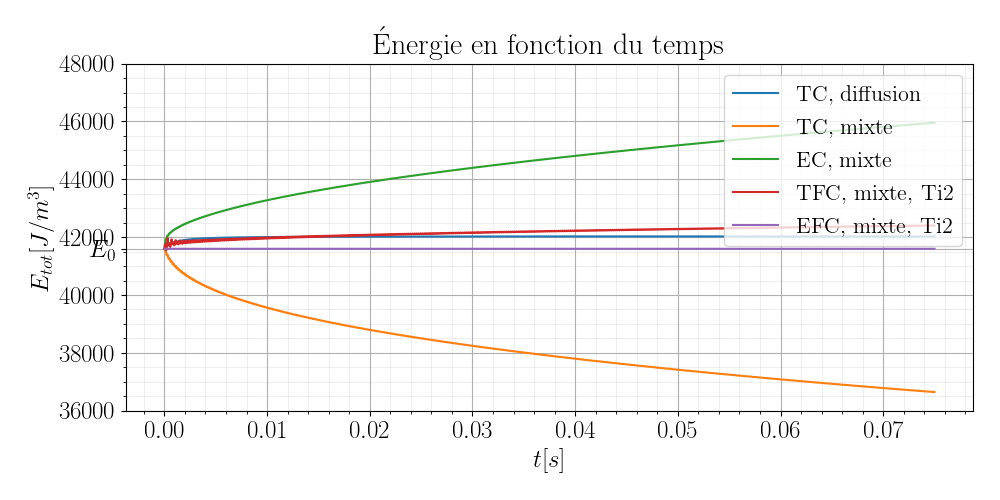

dt fourier
6.918433404737903e-06
diffusion


<IPython.core.display.Javascript object>


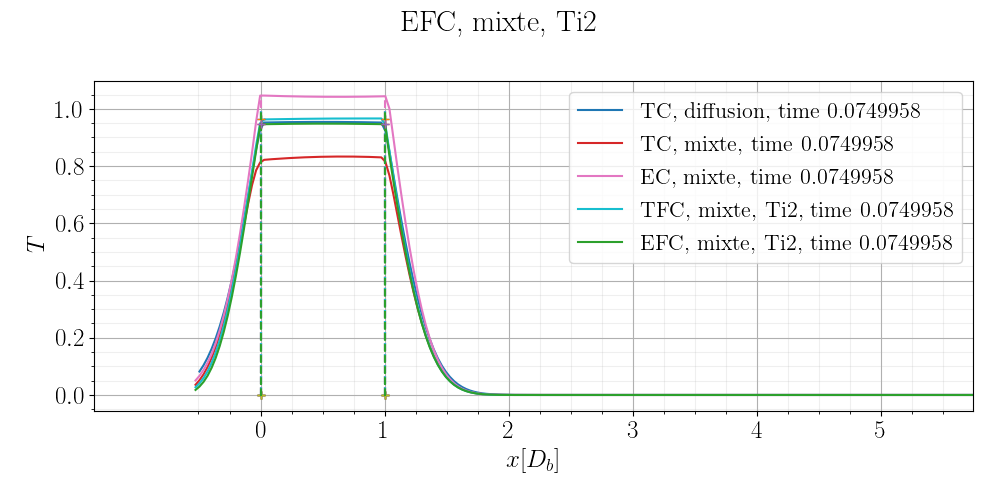

<IPython.core.display.Javascript object>


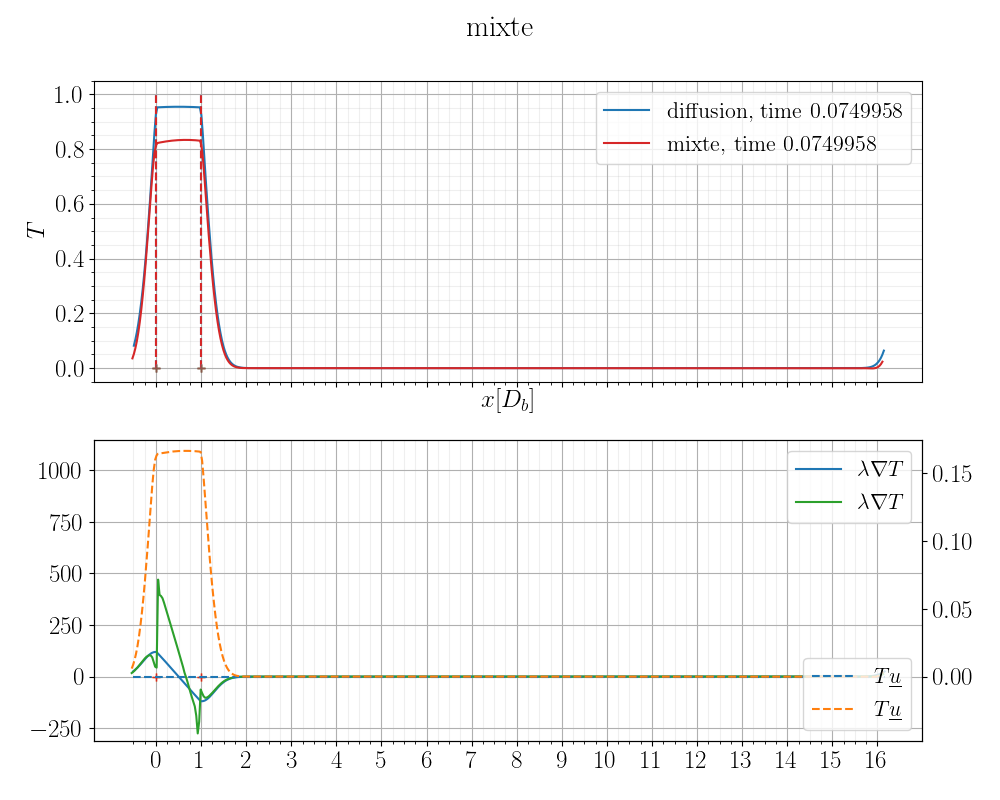

<IPython.core.display.Javascript object>


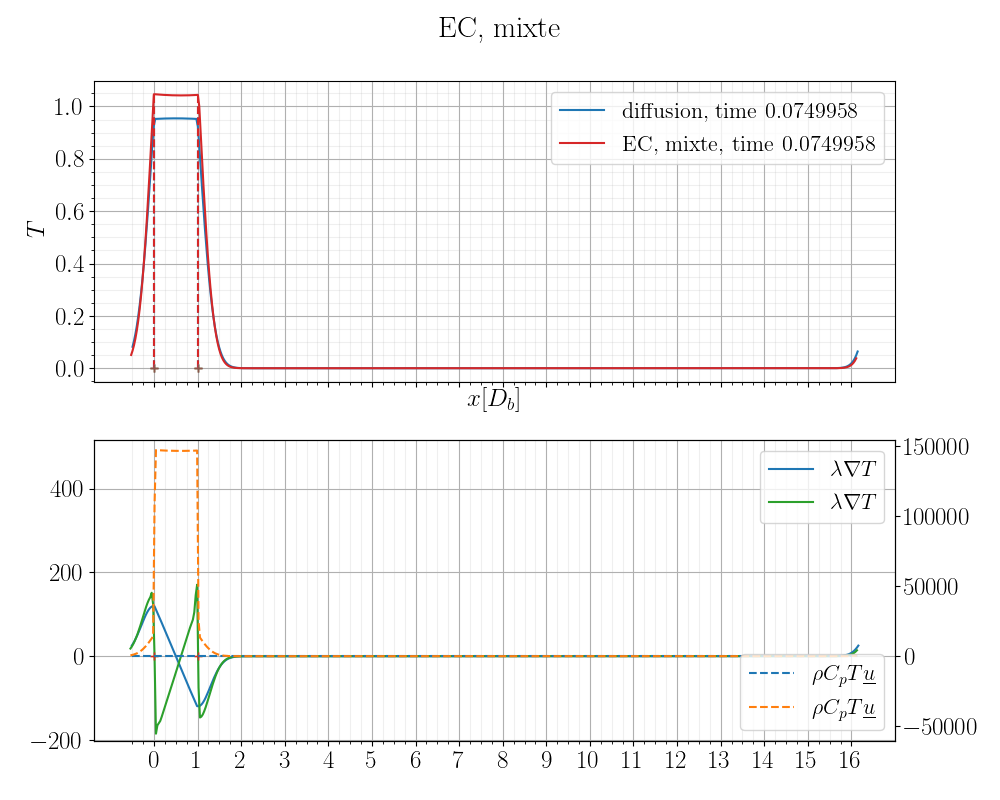

<IPython.core.display.Javascript object>


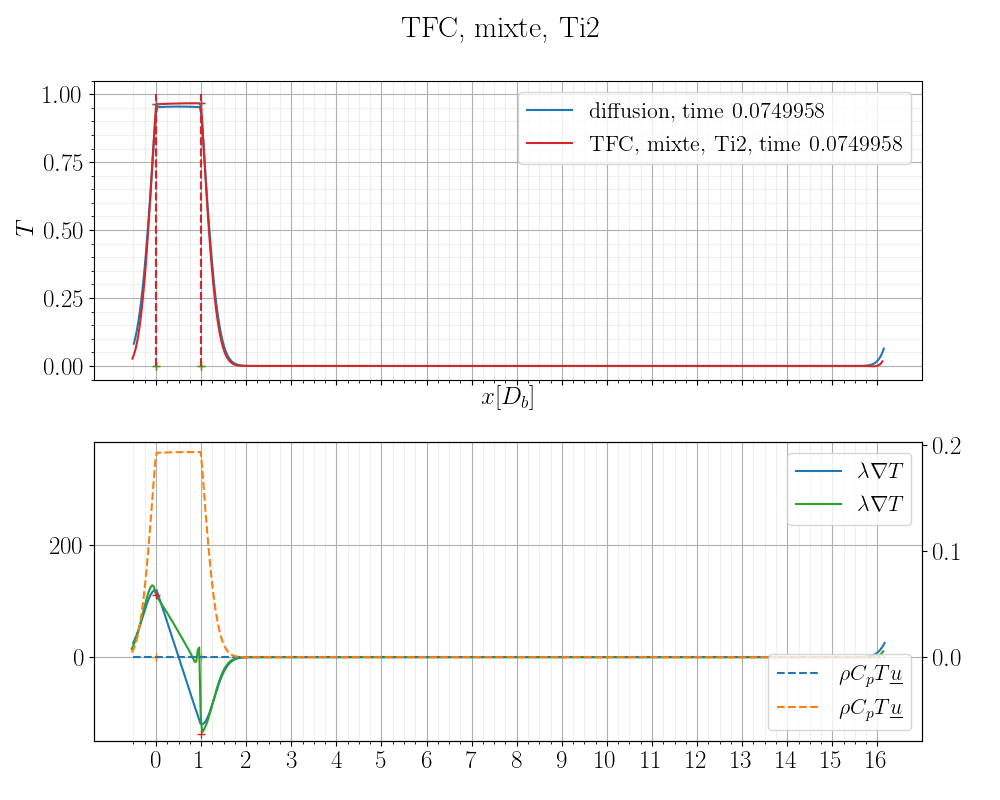

<IPython.core.display.Javascript object>


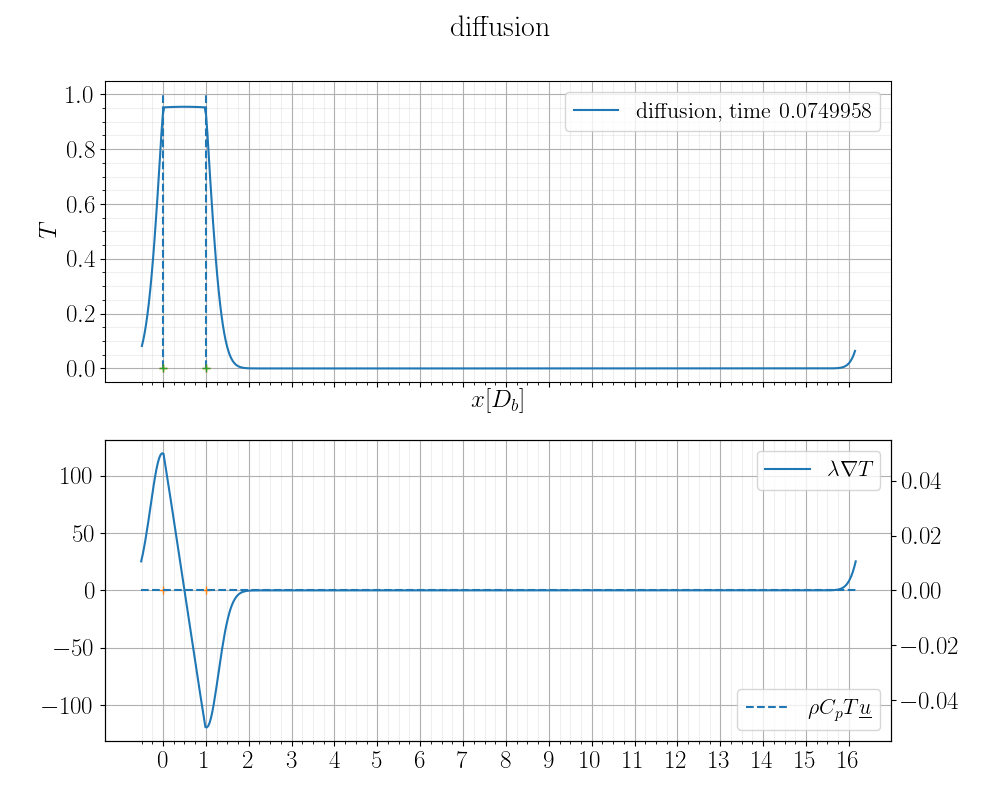

<IPython.core.display.Javascript object>


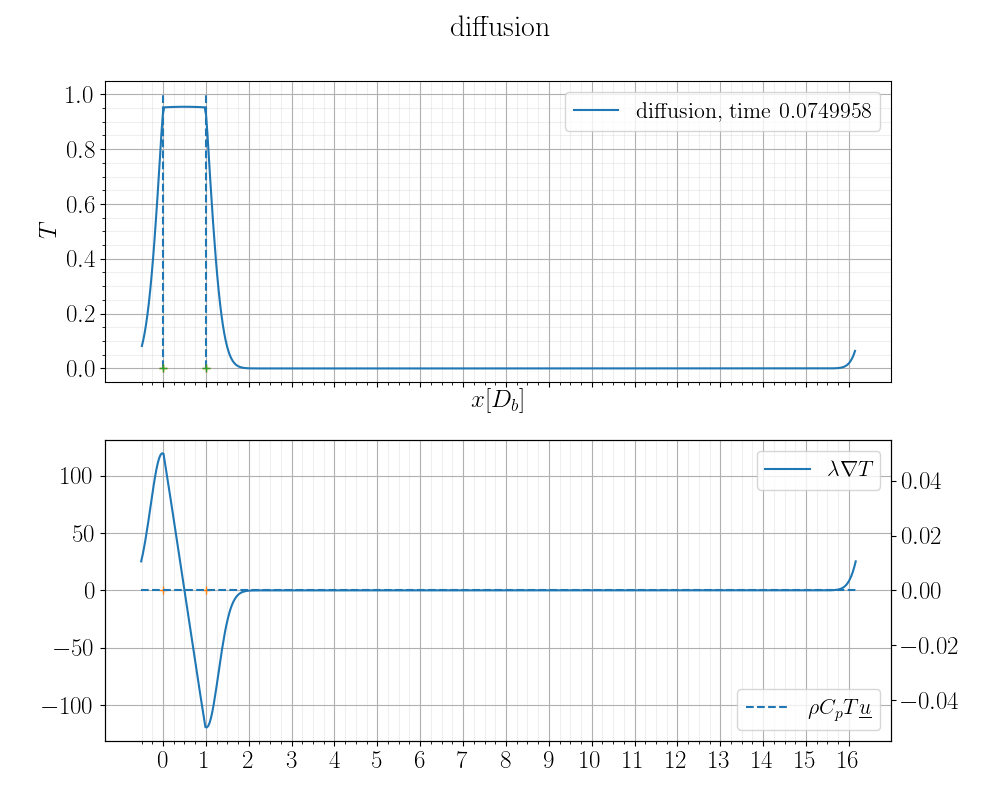

<IPython.core.display.Javascript object>


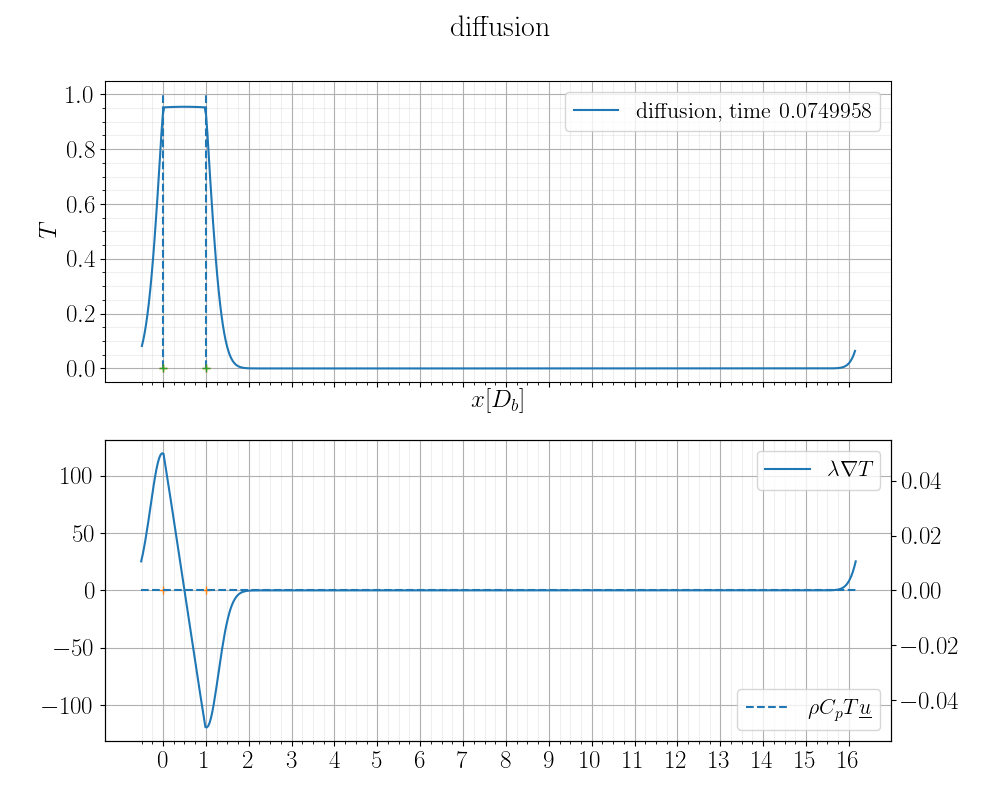

<IPython.core.display.Javascript object>


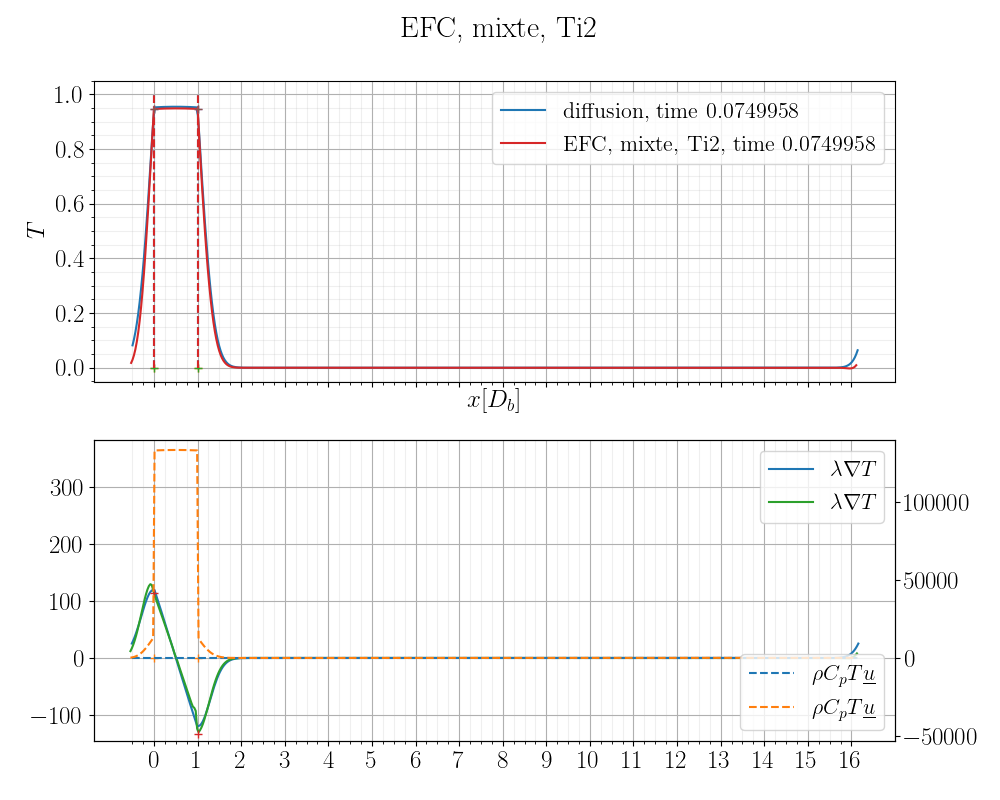

<IPython.core.display.Javascript object>


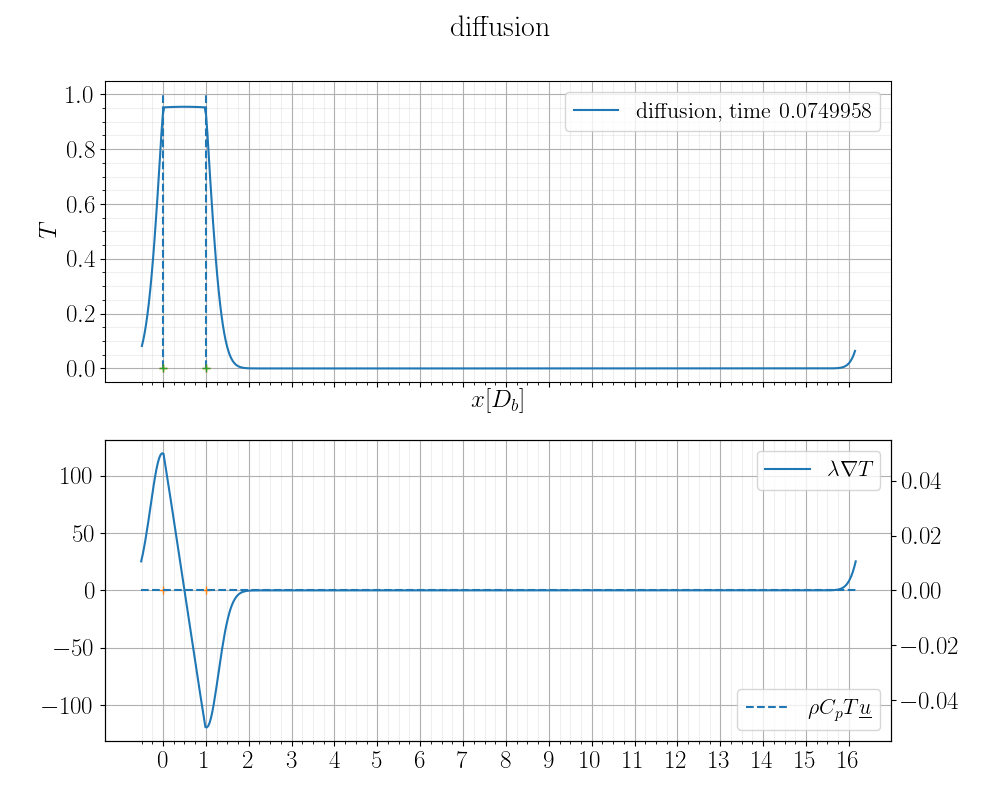

<IPython.core.display.Javascript object>


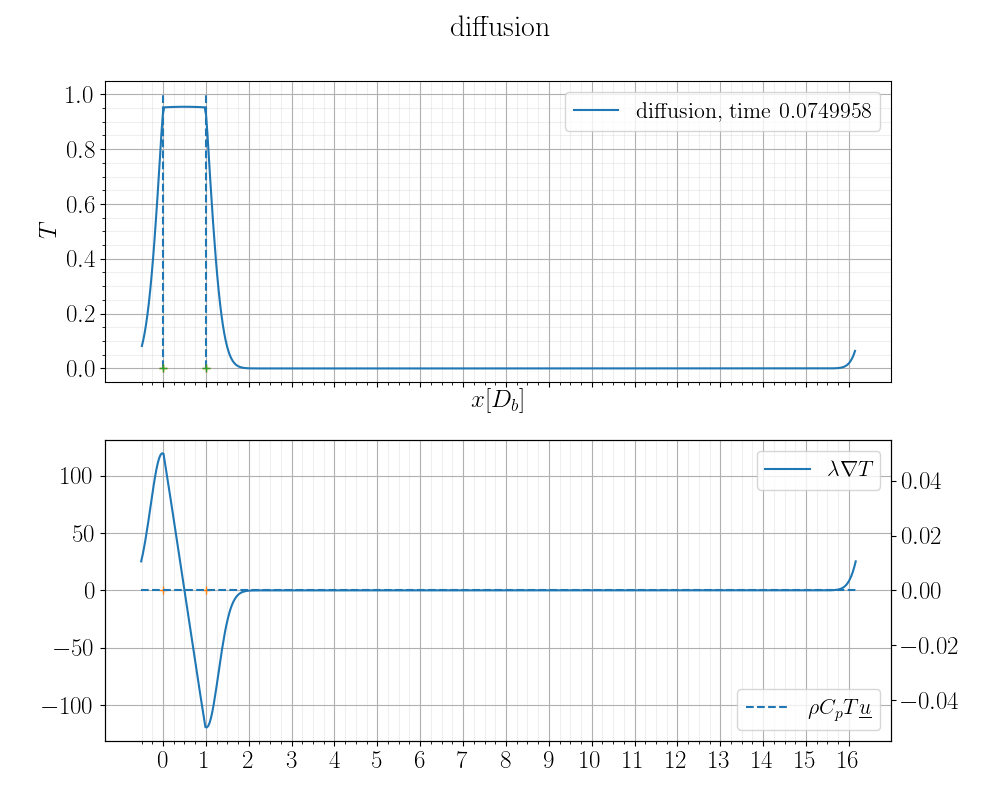

<IPython.core.display.Javascript object>


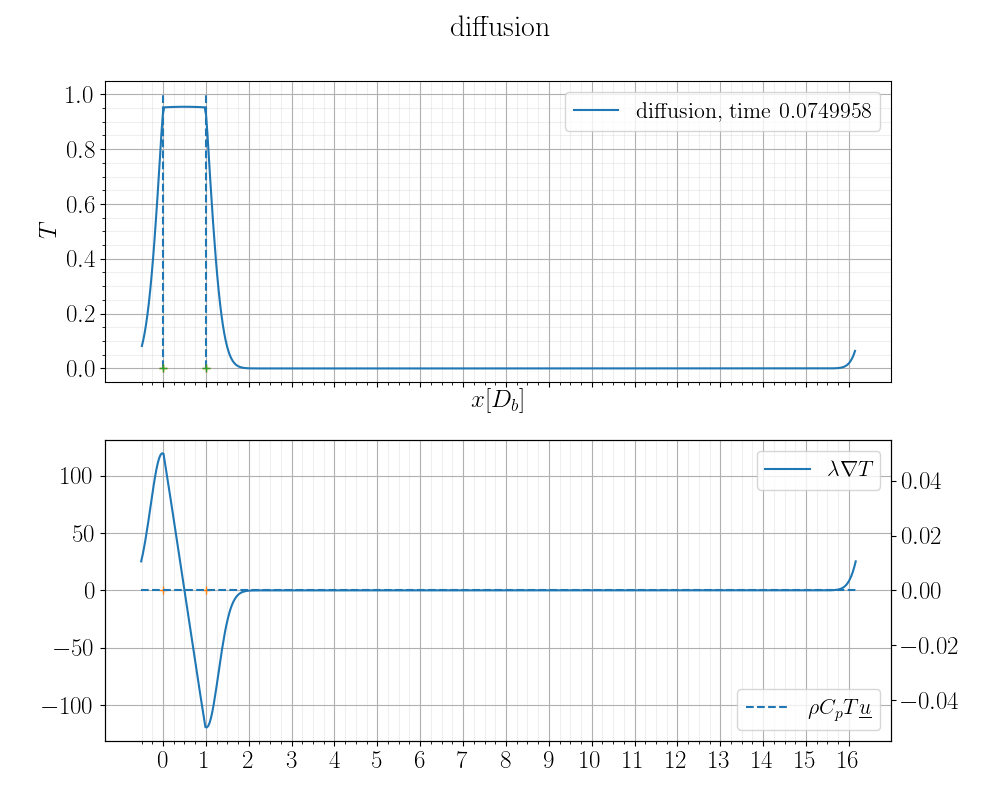

dE*/dt* ref = 3.21166e-08
dt fourier
6.918433404737903e-06
mixte
dE*/dt* = 3.21166e-08
dt fourier
6.918433404737903e-06
EC, mixte
dE*/dt* = 6.48753e-06
dt fourier
6.918433404737903e-06
Ti2
TFC, mixte, Ti2
dE*/dt* = 1.03555e-06
dt fourier
6.918433404737903e-06
Ti2
EFC, mixte, Ti2
dE*/dt* = 7.69393e-20
coeff :  0.21396634985511992
coeff :  0.2818358947607195
coeff :  0.2805852877088416
coeff :  0.2757687388859043


In [5]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale', flux_conv=r'$T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot1 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot1vol = Plotter('decale', flux_conv=r'$T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot2 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot2vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot3 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot3vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot4 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot4vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot5 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot5vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r'$t [s]$')
ax1.set_ylabel(r'$E_{tot} [J/m^3]$')

print('==========================')
prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2, plot2vol, plot3, plot3vol, plot4, plot4vol, plot5, plot5vol])
l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n/5)
dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

print('==========================')
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
t, e = prob0.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0.name)

print('==========================')
prob0conserv = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop_weno)
E0 = prob0conserv.energy
print(prob0conserv.name)
t, e = prob0conserv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0conserv.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0conserv.name)
    
# print('==========================')
# prob1 = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
# E0 = prob1.energy
# print(prob1.name)
# t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)

# print('==========================')
# prob1vol = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti_vol')
# E0 = prob1vol.energy
# print(prob1vol.name)
# t, e = prob1vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1vol.name)

print('==========================')
prob2 = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
E0 = prob2.energy
print(prob2.name)
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)

# print('==========================')
# prob2b = ProblemDiscontinuT2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
# E0 = prob2b.energy
# print(prob2b.name)
# t, e = prob2b.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2b])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2b.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2b.name)

# print('==========================')
# prob2vol = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3_vol')
# E0 = prob2vol.energy
# print(prob2vol.name)
# t, e = prob2vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2vol.name)

# print('==========================')
# prob3 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', conv_interf='quick')
# E0 = prob3.energy
# print(prob3.name)
# t, e = prob3.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3.name)

# print('==========================')
# prob3vol = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti_vol')
# E0 = prob3vol.energy
# print(prob3vol.name)
# t, e = prob3vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3vol.name)

print('==========================')
prob4 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
E0 = prob4.energy
print(prob4.name)
t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)

# print('==========================')
# prob4vol = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2_vol')
# E0 = prob4vol.energy
# print(prob4vol.name)
# t, e = prob4vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4vol.name)

# print('==========================')
# prob5 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3', conv_interf='quick')
# E0 = prob5.energy
# print(prob5.name)
# t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)

# print('==========================')
# prob5vol = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3_vol')
# E0 = prob5vol.energy
# print(prob5vol.name)
# t, e = prob5vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5vol.name)

# print('==========================')
# prob5vol = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3_1_vol')
# E0 = prob5vol.energy
# print(prob5vol.name)
# t, e = prob5vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5vol.name)

# Diverge !!!
# 
# prob4 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
# E0 = prob4.energy
# print(prob4.name)
# print('==========================')
# t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)


# prob5 = ProblemDiscontinuEnergieTemperature(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
# E0 = prob5.energy
# print(prob5.name)
# print('==========================')
# t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

for pl in [plot0, plot1, plot2, plot4]:
    align_y_axis(pl.ax2, pl.ax3)

# Modif plot énergie 

ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

handles, labels = ax1.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
ax1.legend(handles, labels)
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + 'energie.pdf')

# Modif plot température

handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + 'temperature_comparaison_euler_quick.pdf')
    plot4.fig.savefig(savefig_path + 'conservation_energie_comparaison_euler_quick.pdf')


# Test des différents opérateurs sans diffusion

In [6]:
n_lim = 10**8
t_fin_lim = 0.075

In [7]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=0.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=1.)
num_prop_weno = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


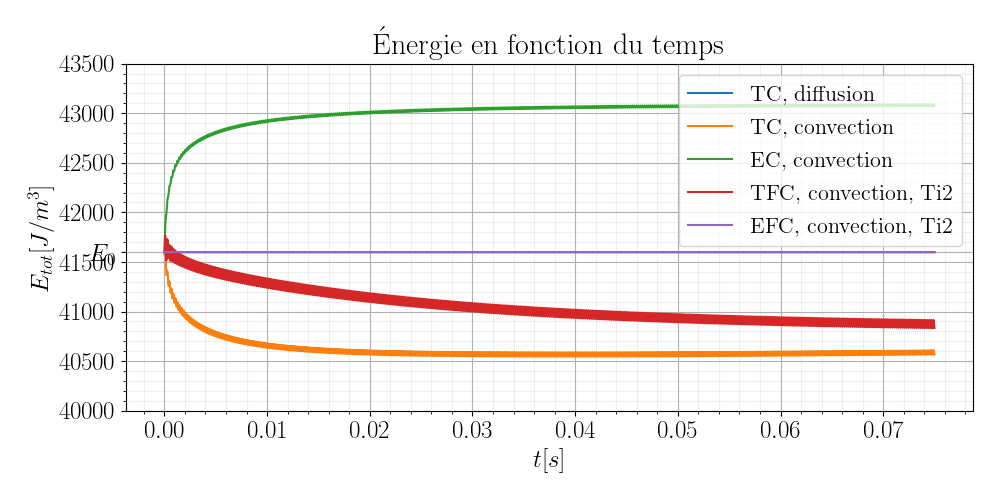

dt fourier
6.918433404737903e-06
diffusion


<IPython.core.display.Javascript object>


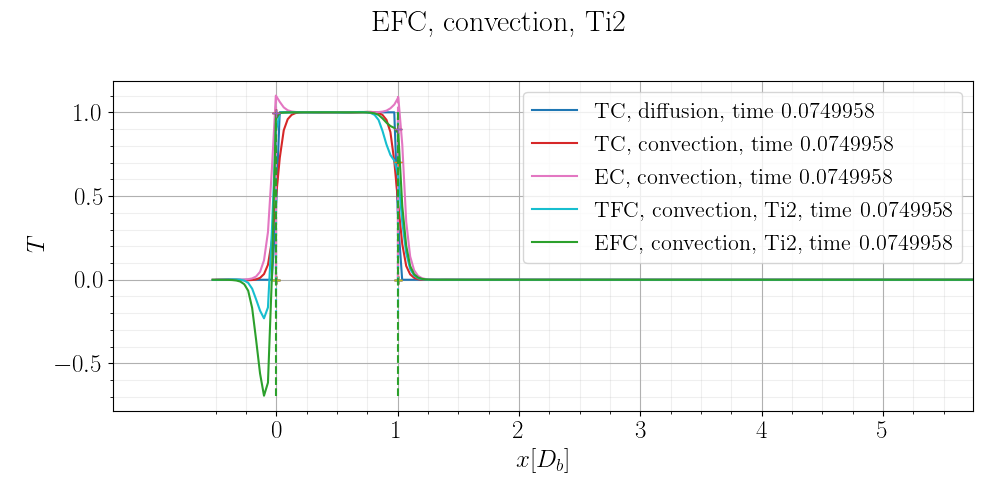

<IPython.core.display.Javascript object>


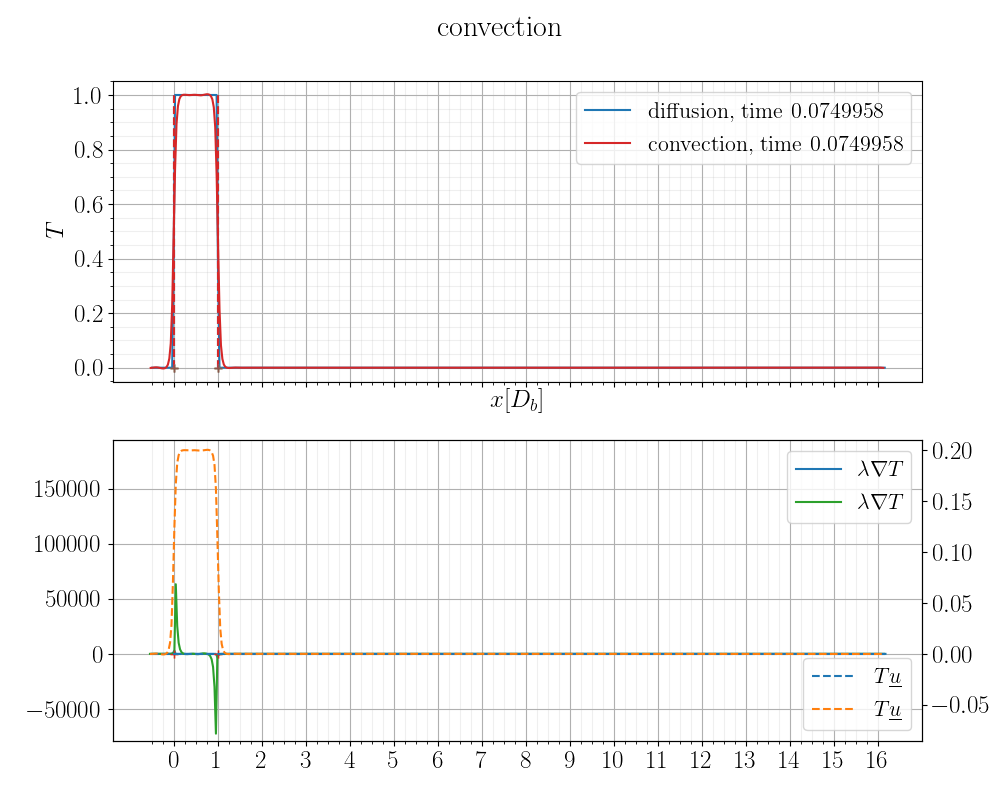

<IPython.core.display.Javascript object>


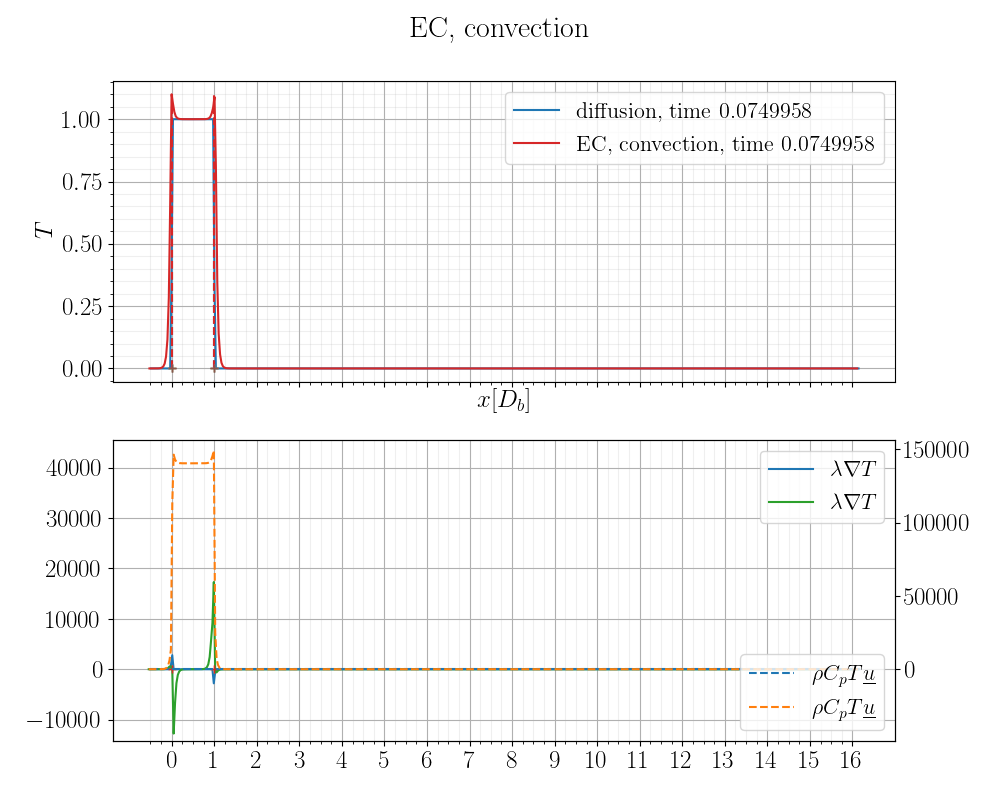

<IPython.core.display.Javascript object>


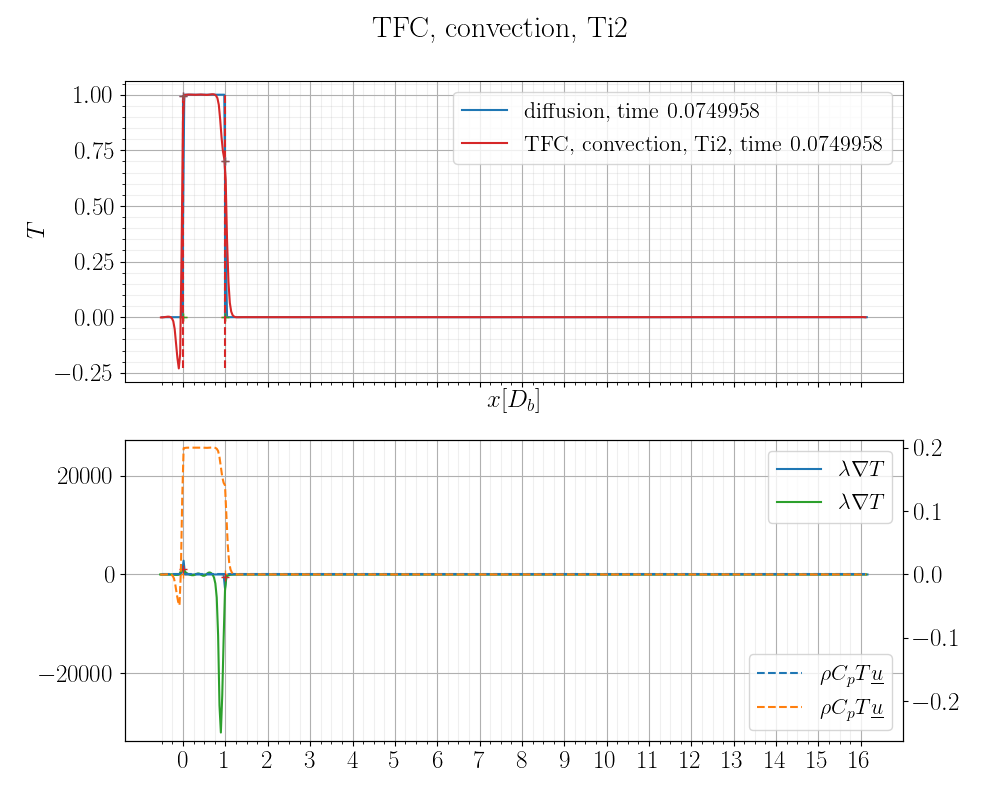

<IPython.core.display.Javascript object>


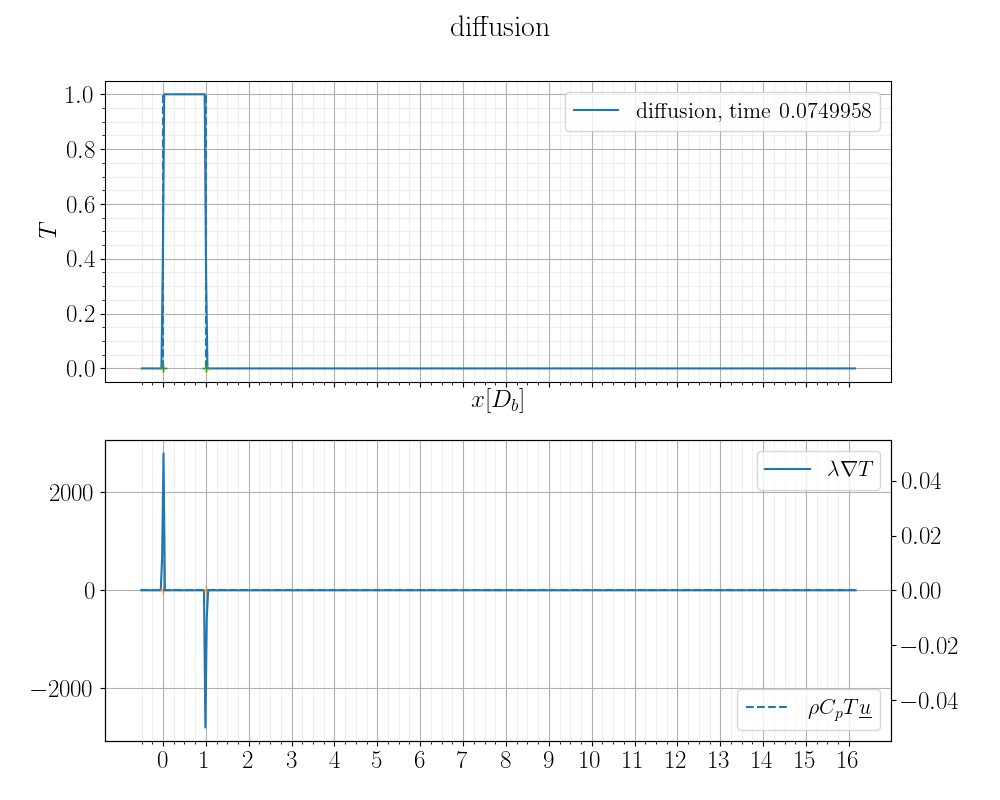

<IPython.core.display.Javascript object>


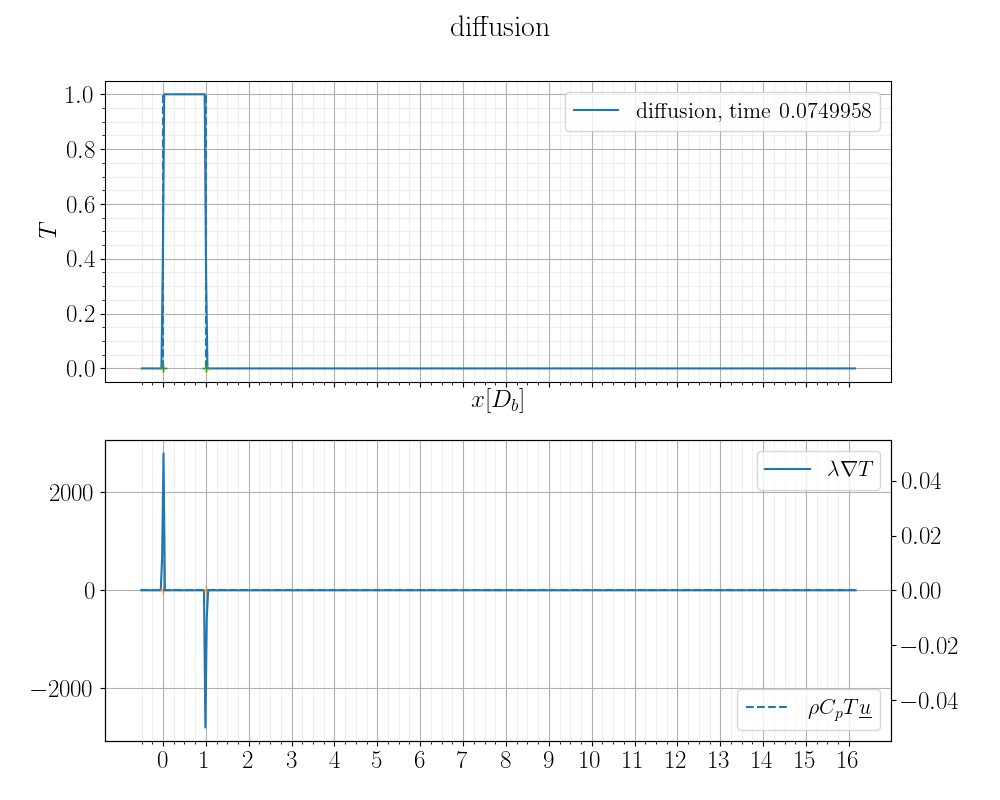

<IPython.core.display.Javascript object>


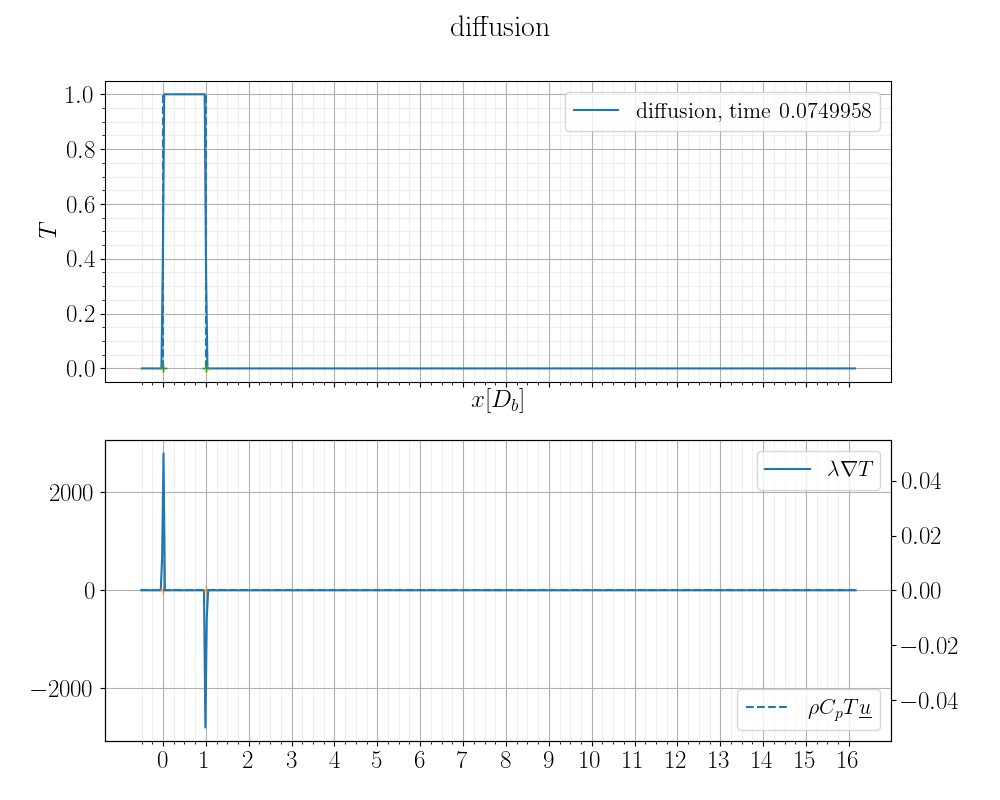

<IPython.core.display.Javascript object>


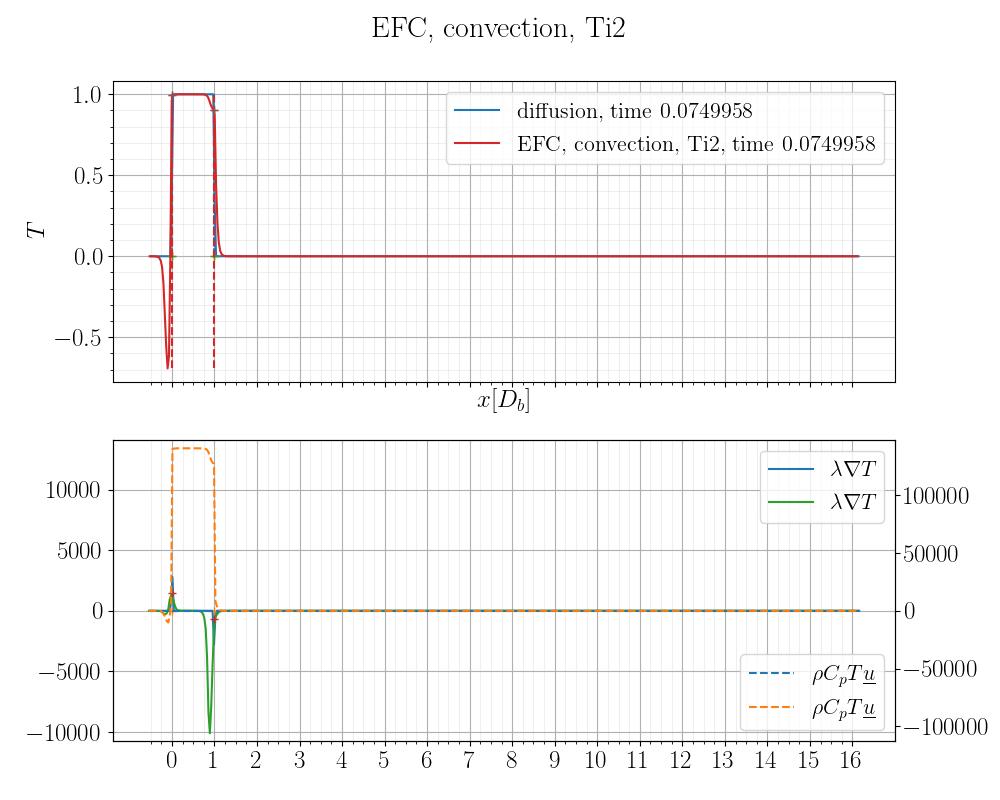

<IPython.core.display.Javascript object>


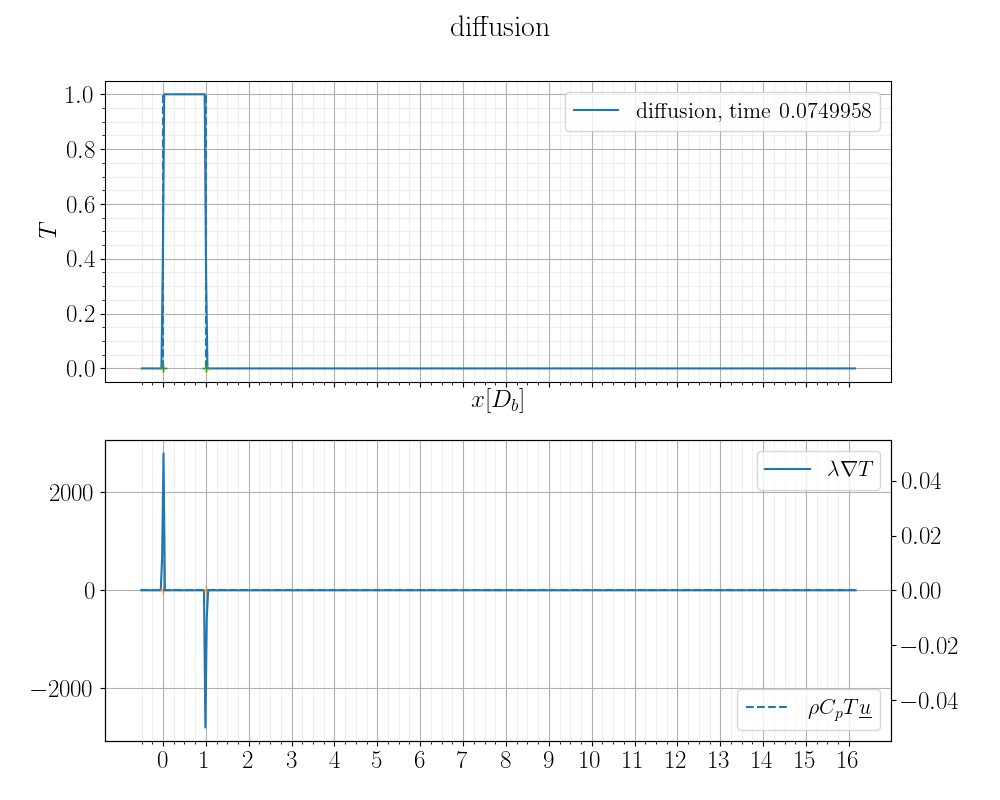

<IPython.core.display.Javascript object>


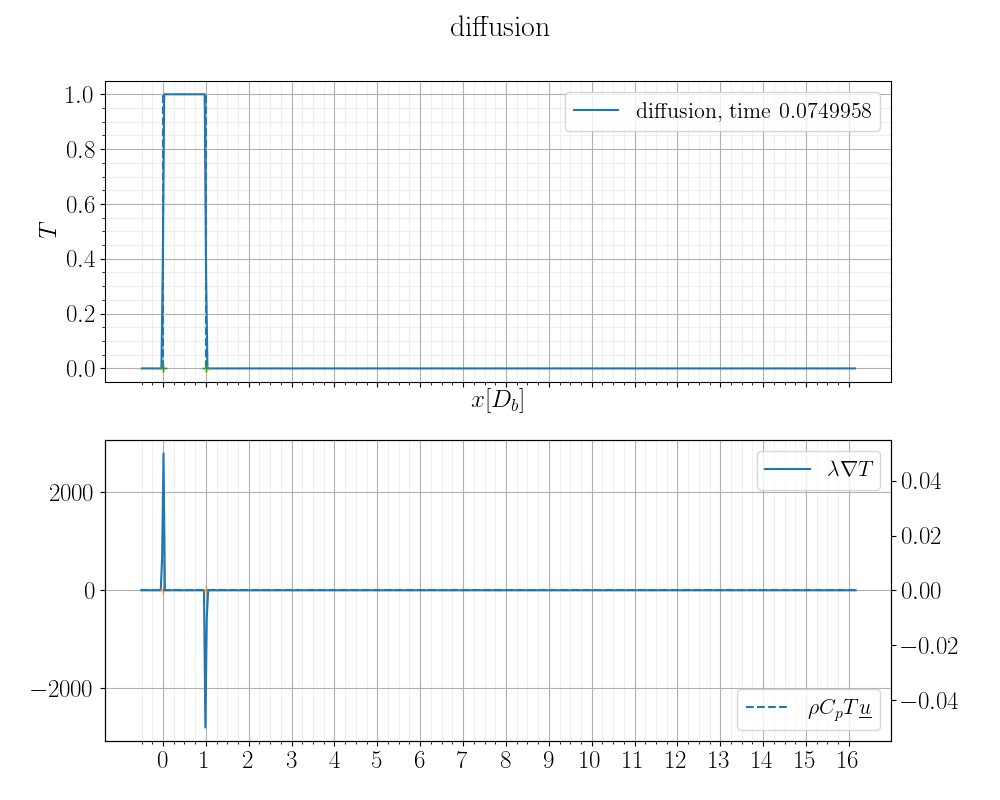

<IPython.core.display.Javascript object>


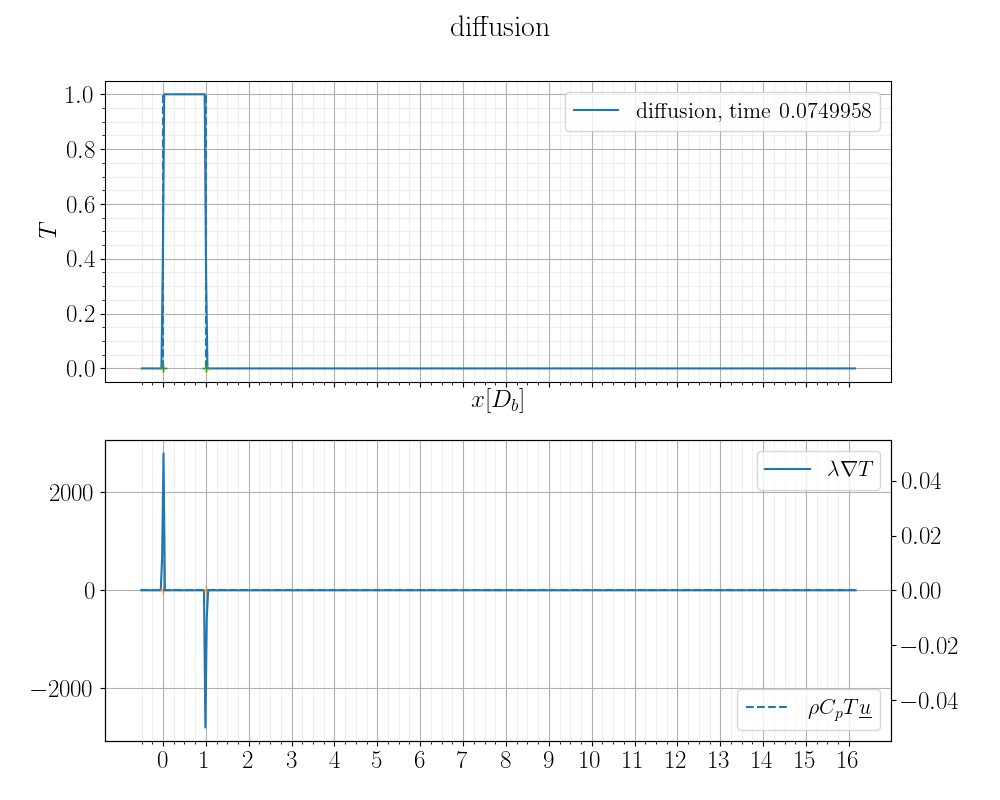

dE*/dt* ref = 0
dt fourier
6.918433404737903e-06
convection
dE*/dt* = 0
dt fourier
6.918433404737903e-06
EC, convection
dE*/dt* = 3.00023e-07
dt fourier
6.918433404737903e-06
Ti2
TFC, convection, Ti2
dE*/dt* = -1.0033e-06
dt fourier
6.918433404737903e-06
Ti2
EFC, convection, Ti2
dE*/dt* = -3.84697e-20
coeff :  0.28935826836671136
coeff :  0.23843268537151696
coeff :  0.5526758191814788
coeff :  0.4322080767946102


In [8]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale', flux_conv=r'$T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot1 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot1vol = Plotter('decale', flux_conv=r'$T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot2 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot2vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot3 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot3vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot4 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot4vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot5 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
plot5vol = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r'$t [s]$')
ax1.set_ylabel(r'$E_{tot} [J/m^3]$')

print('==========================')
prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2, plot2vol, plot3, plot3vol, plot4, plot4vol, plot5, plot5vol])
l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n/5)
dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

print('==========================')
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
t, e = prob0.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0.name)

print('==========================')
prob0conserv = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop_weno)
E0 = prob0conserv.energy
print(prob0conserv.name)
t, e = prob0conserv.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0conserv.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0conserv.name)
    
# print('==========================')
# prob1 = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
# E0 = prob1.energy
# print(prob1.name)
# t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)

# print('==========================')
# prob1vol = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti_vol')
# E0 = prob1vol.energy
# print(prob1vol.name)
# t, e = prob1vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1vol.name)

print('==========================')
prob2 = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
E0 = prob2.energy
print(prob2.name)
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)

# print('==========================')
# prob2b = ProblemDiscontinuT2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
# E0 = prob2b.energy
# print(prob2b.name)
# t, e = prob2b.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2b])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2b.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2b.name)

# print('==========================')
# prob2vol = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3_vol')
# E0 = prob2vol.energy
# print(prob2vol.name)
# t, e = prob2vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2vol.name)

# print('==========================')
# prob3 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti', conv_interf='quick')
# E0 = prob3.energy
# print(prob3.name)
# t, e = prob3.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3.name)

# print('==========================')
# prob3vol = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti_vol')
# E0 = prob3vol.energy
# print(prob3vol.name)
# t, e = prob3vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3vol.name)

print('==========================')
prob4 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
E0 = prob4.energy
print(prob4.name)
t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)

# print('==========================')
# prob4vol = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2_vol')
# E0 = prob4vol.energy
# print(prob4vol.name)
# t, e = prob4vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4vol.name)

# print('==========================')
# prob5 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3', conv_interf='quick')
# E0 = prob5.energy
# print(prob5.name)
# t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)

# print('==========================')
# prob5vol = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3_vol')
# E0 = prob5vol.energy
# print(prob5vol.name)
# t, e = prob5vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5vol.name)

# print('==========================')
# prob5vol = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3_1_vol')
# E0 = prob5vol.energy
# print(prob5vol.name)
# t, e = prob5vol.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5vol])

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5vol.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)
# if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
#     l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5vol.name)

# Diverge !!!
# 
# prob4 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
# E0 = prob4.energy
# print(prob4.name)
# print('==========================')
# t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)


# prob5 = ProblemDiscontinuEnergieTemperature(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
# E0 = prob5.energy
# print(prob5.name)
# print('==========================')
# t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

for pl in [plot0, plot1, plot2, plot4]:
    align_y_axis(pl.ax2, pl.ax3)

# Modif plot énergie 

ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

handles, labels = ax1.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
ax1.legend(handles, labels)
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + 'energie.pdf')

# Modif plot température

handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [K]$')
plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + 'temperature_comparaison_sans_diffusion_weno.pdf')
    plot4.fig.savefig(savefig_path + 'conservation_energie_comparaison_sans_diffusion_weno.pdf')


# Test avec euler et WENO

In [9]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=0.5, fo=1.)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


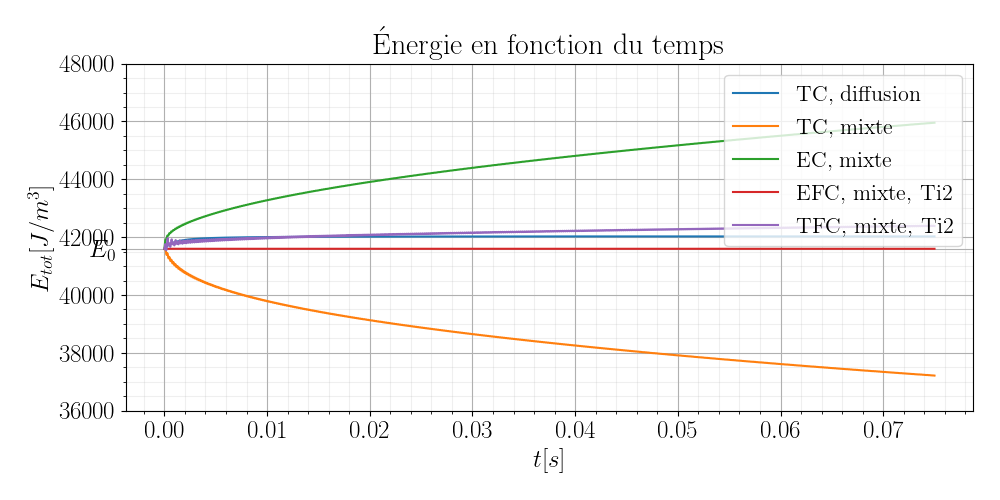

dt fourier
6.918433404737903e-06
diffusion


<IPython.core.display.Javascript object>


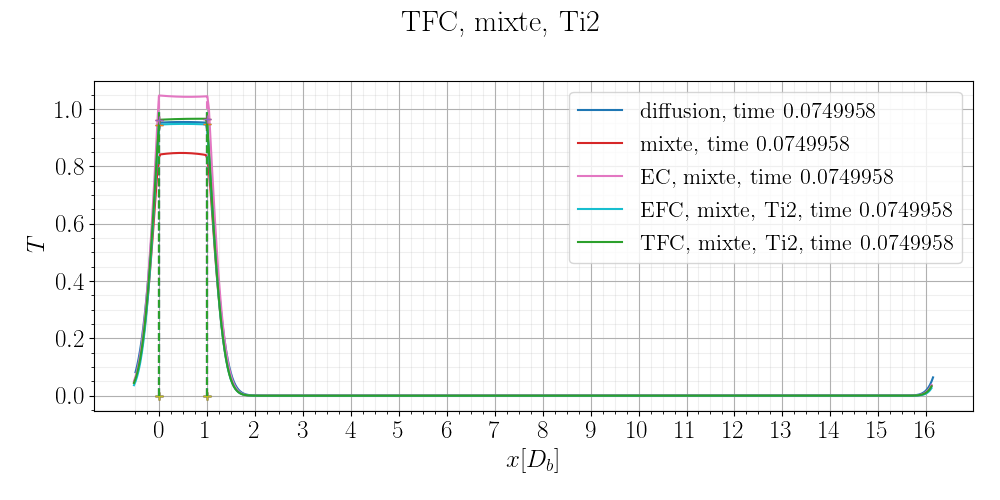

<IPython.core.display.Javascript object>


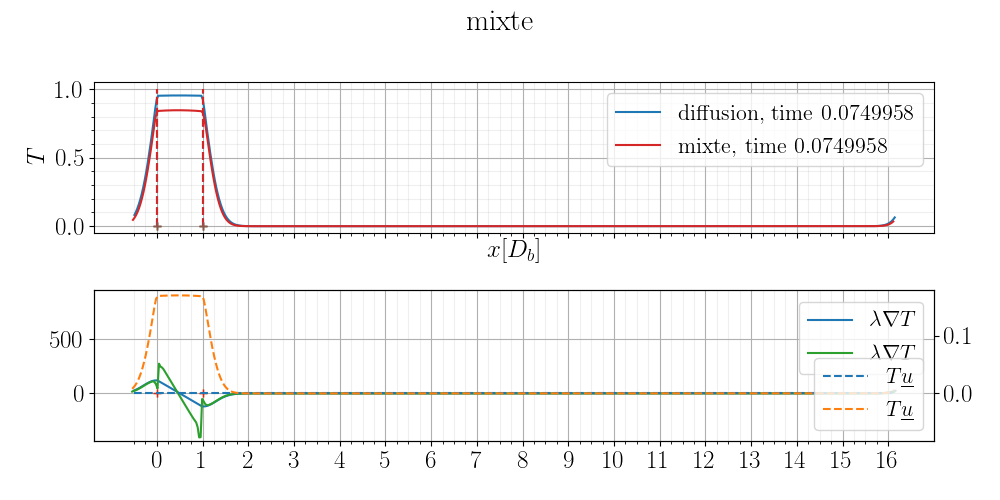

<IPython.core.display.Javascript object>


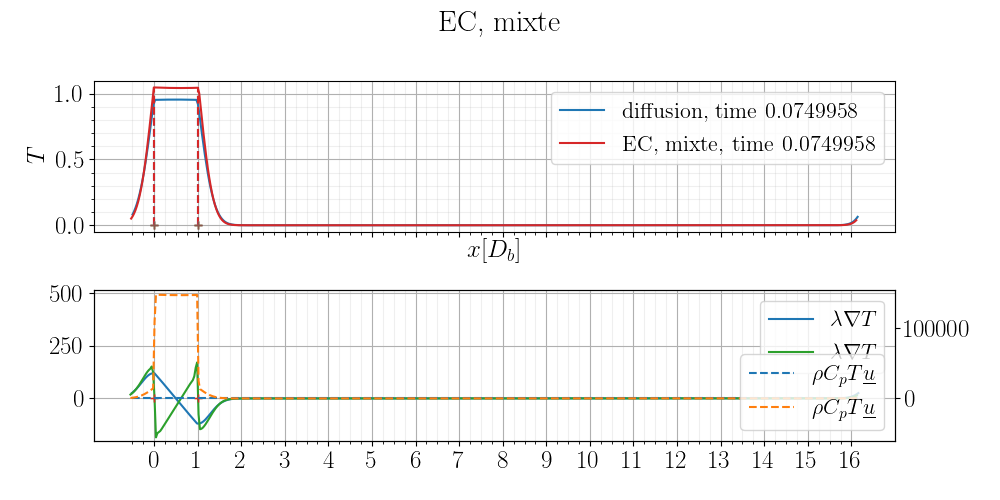

<IPython.core.display.Javascript object>


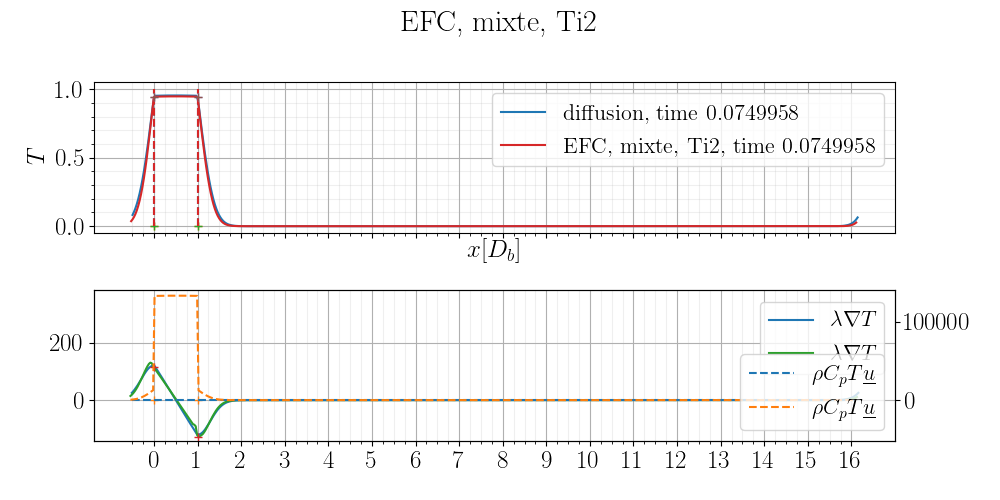

<IPython.core.display.Javascript object>


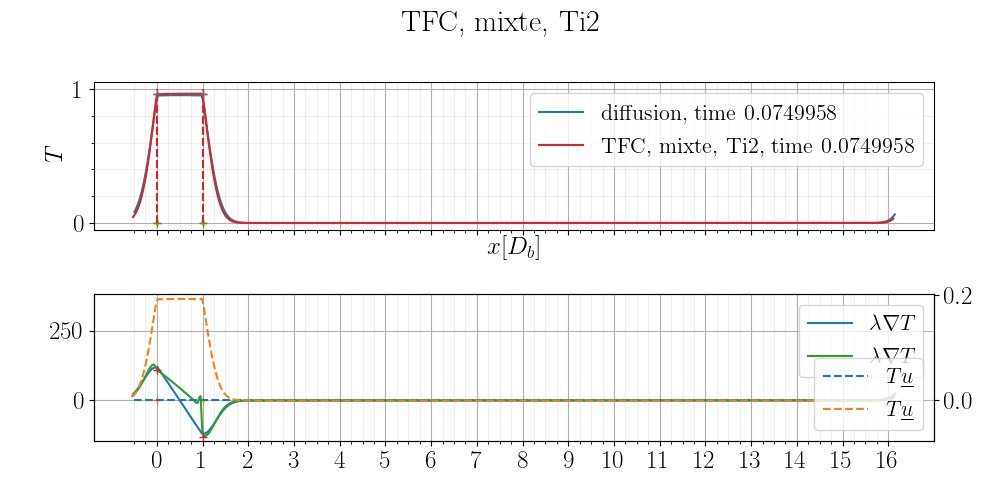

dE*/dt* ref = 3.21166e-08
dt fourier
6.918433404737903e-06
mixte
dE*/dt* = -6.13192e-06
dt fourier
6.918433404737903e-06
EC, mixte
dE*/dt* = 6.48753e-06
dt fourier
6.918433404737903e-06
Ti2
EFC, mixte, Ti2
dE*/dt* = -7.69393e-20
dt fourier
6.918433404737903e-06
Ti2
TFC, mixte, Ti2
dE*/dt* = 9.92486e-07
coeff :  0.31663017542462446
coeff :  0.2818358947607195
coeff :  0.2721908488429934
coeff :  0.2760241068678769


In [10]:
t_fin = 0.08
plot = Plotter('decale')
plot0 = Plotter('decale', flux_conv=r'$T\underline{u}$', lda_gradT=True)
plot1 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True)
plot2 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True)
plot3 = Plotter('decale', flux_conv=r'$T\underline{u}$', lda_gradT=True)
# plot5 = Plotter('classic')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
ax1.set_xlabel(r'$t [s]$')
ax1.set_ylabel(r'$E_{tot} [J/m^3]$')

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2, plot3])
l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n/5)
dedt_adim_ref = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim_ref)

prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
print('==========================')
t, e = prob0.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob0.name)

prob1 = ProblemConserv2(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)

prob2 = ProblemDiscontinuE(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
E0 = prob2.energy
print(prob2.name)
print('==========================')
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)

prob3 = ProblemDiscontinuT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2', conv_interf='quick')
E0 = prob3.energy
print(prob3.name)
print('==========================')
t, e = prob3.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot3])

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob3.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)
if abs(dedt_adim) < 1000*abs(dedt_adim_ref):
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob3.name)

for pl in [plot0, plot1, plot2, plot3]:
    align_y_axis(pl.ax2, pl.ax3)

# prob4 = ProblemDiscontinuSautdTdt(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
# E0 = prob4.energy
# print(prob4.name)
# print('==========================')
# t, e = prob4.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot4])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob4.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob4.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)


# prob5 = ProblemDiscontinuEnergieTemperature(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
# E0 = prob5.energy
# print(prob5.name)
# print('==========================')
# t, e = prob5.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot5])
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob5.name)

# dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob5.dt / E0  # on a mult
# print('dE*/dt* = %g' % dedt_adim)

# Modif plot énergie 

ax1.minorticks_on()
ax1.grid(b=True, which='major')
ax1.grid(b=True, which='minor', alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0/(0.02*0.005**2))
labels.append(r'$E_0$')

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

handles, labels = ax1.get_legend_handles_labels()
labels[0] = 'TC, ' + labels[0]
labels[1] = 'TC, ' + labels[1]
ax1.legend(handles, labels)
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + 'energie_comparaison_euler_weno.png')

# Modif plot température

# handles, labels = plot.ax.get_legend_handles_labels()
# labels[0] = 'TC, ' + labels[0]
# labels[1] = 'TC, ' + labels[1]
# plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [K]$')
if save_fig:
    plot.fig.savefig(savefig_path + 'temperature_comparaison_euler_weno.png')